<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Construction_Materials_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset_path = '/content/drive/MyDrive/DATA 606 Capstone/Dataset/Merged Data'

In [6]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Construction_Materials.csv")

In [7]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14431 entries, 0 to 14430
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                14431 non-null  object 
 1   Symbol              14431 non-null  object 
 2   Series              14431 non-null  object 
 3   Prev Close          14431 non-null  float64
 4   Open                14431 non-null  float64
 5   High                14431 non-null  float64
 6   Low                 14431 non-null  float64
 7   Last                14431 non-null  float64
 8   Close               14431 non-null  float64
 9   VWAP                14431 non-null  float64
 10  Volume              14431 non-null  int64  
 11  Turnover            14431 non-null  float64
 12  Trades              7368 non-null   float64
 13  Deliverable Volume  13734 non-null  float64
 14  %Deliverble         13734 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.7

In [8]:
# Summary statistics of the dataset
print(sector_data.describe())

         Prev Close          Open          High           Low          Last  \
count  14431.000000  14431.000000  14431.000000  14431.000000  14431.000000   
mean    3527.302373   3531.344162   3586.017248   3474.621433   3528.624250   
std     5192.907175   5199.350309   5277.606777   5116.712542   5194.352176   
min       10.000000     24.750000     26.000000     22.500000     24.500000   
25%      781.325000    785.000000    798.900000    766.100000    781.025000   
50%     1789.550000   1792.500000   1820.000000   1757.050000   1790.000000   
75%     3560.825000   3562.000000   3615.000000   3514.925000   3562.725000   
max    31748.750000  31682.400000  32048.000000  31120.000000  31680.000000   

              Close          VWAP        Volume      Turnover         Trades  \
count  14431.000000  14431.000000  1.443100e+04  1.443100e+04    7368.000000   
mean    3529.735746   3530.076158  2.565819e+05  4.618627e+13   17924.217427   
std     5196.725168   5195.996377  6.410149e+05 

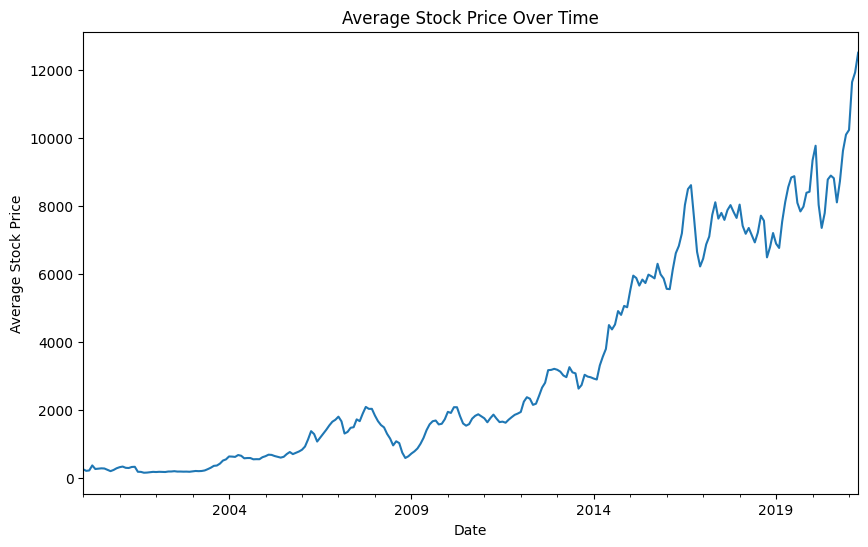

In [9]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

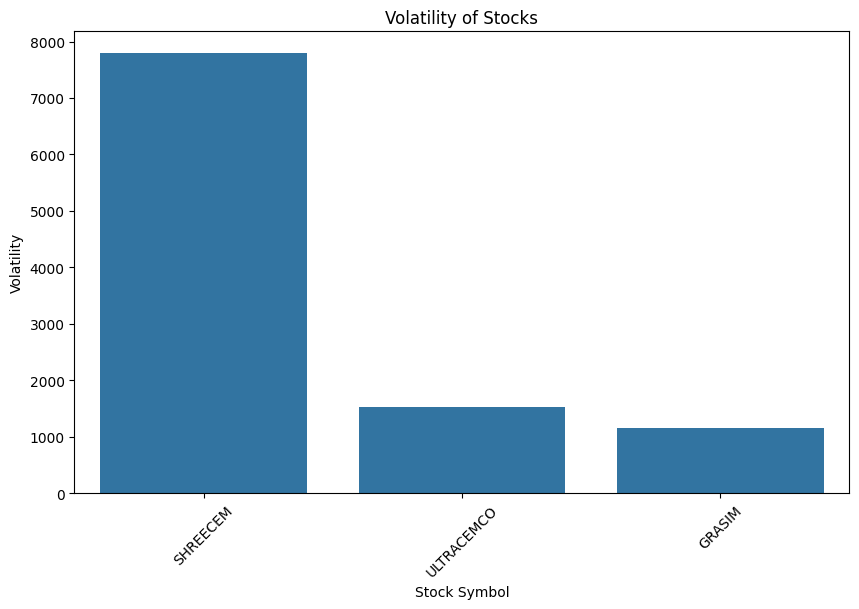

In [10]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

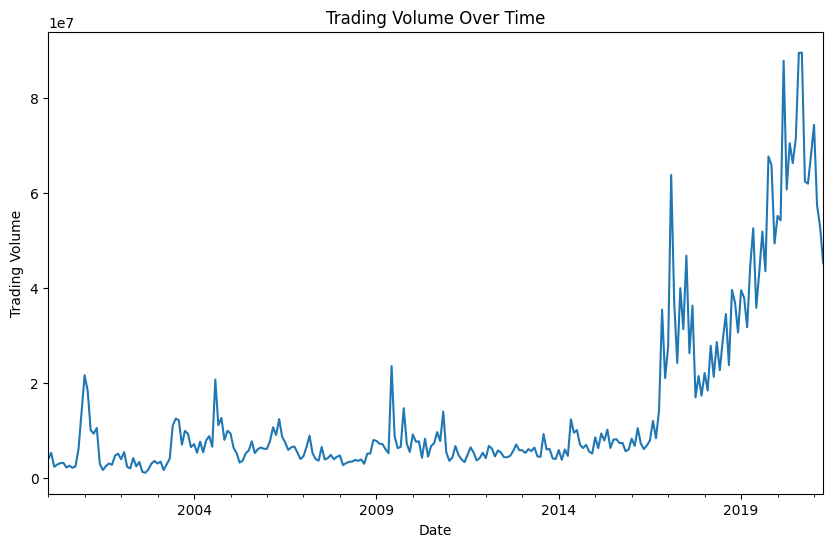

In [11]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


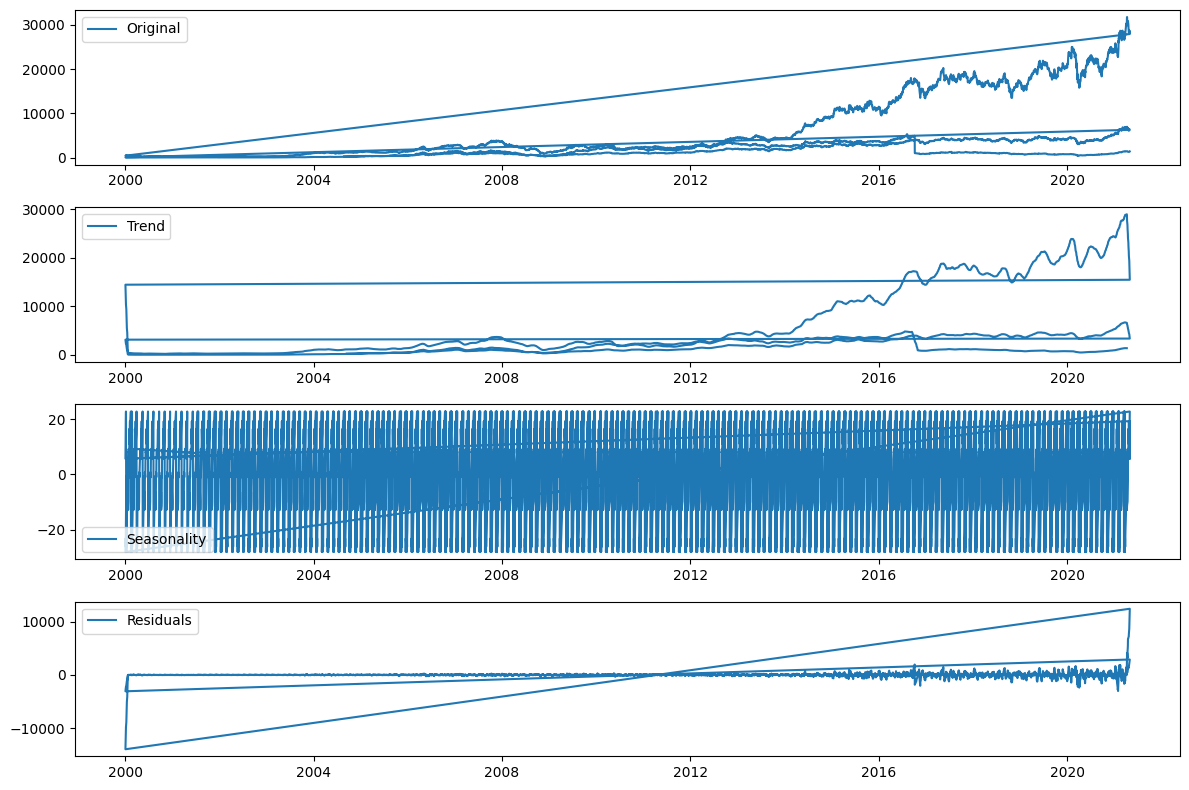

In [12]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

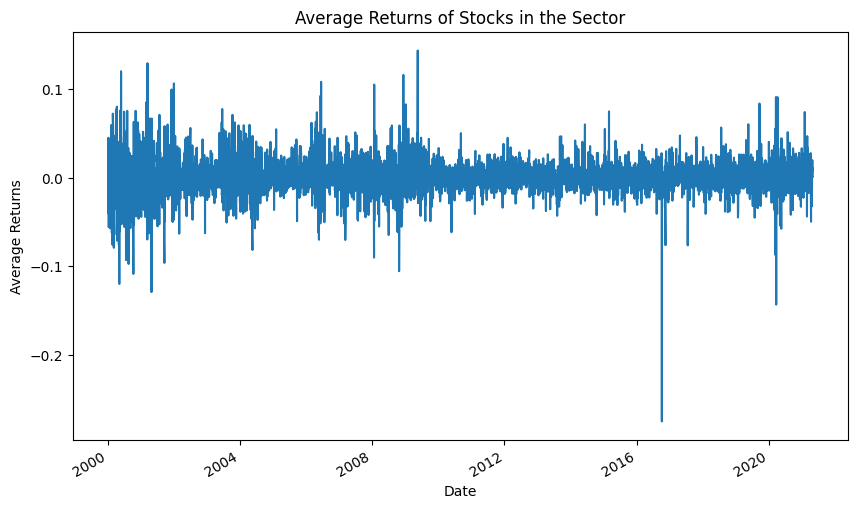

In [13]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()